<a href="https://colab.research.google.com/github/iPraveenParihar/Colab/blob/master/Rock_paper_scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import json

!pip install kaggle

!mkdir .kaggle
!mkdir ~/.kaggle
token = {"username":"praveenparihar","key":"9f3b22b101376ef198045cc6e990ad90"}

with open('/content/.kaggle/kaggle.json','w') as file:
  json.dump(token,file)
  

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘.kaggle’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists
- path is now set to: {/content}


In [49]:
!kaggle datasets download -d drgfreeman/rockpaperscissors -p /content

rockpaperscissors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip /content/rockpaperscissors.zip

In [0]:
import os
import random
import pandas as pd
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [52]:
classes = ['paper', 'rock', 'scissors']
data_dir = []

for c in classes:
  data_dir.append('/content/'+c+'/')

data_dir

['/content/paper/', '/content/rock/', '/content/scissors/']

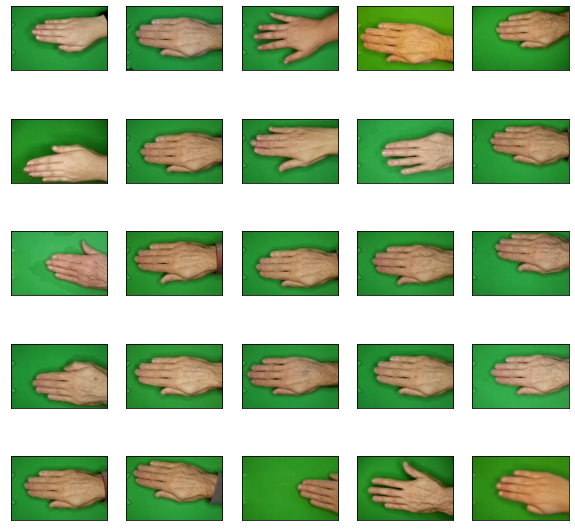

In [53]:
plt.figure(figsize=(10, 10))
for i in range(25):
  img = mpimg.imread(data_dir[0]+random.choice([x for x in os.listdir(data_dir[0])]))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
plt.show()  

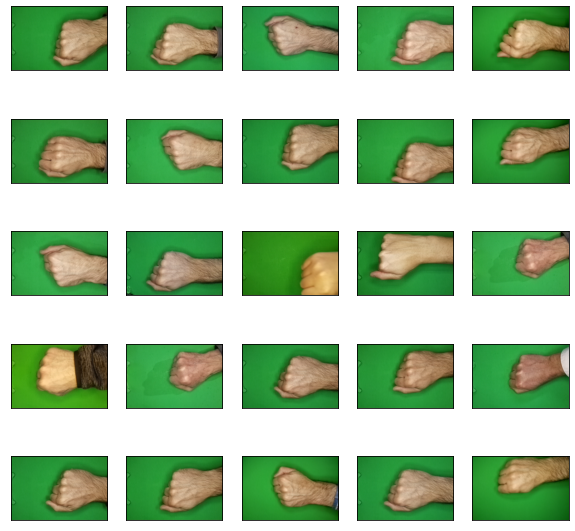

In [54]:
plt.figure(figsize=(10, 10))
for i in range(25):
  img = mpimg.imread(data_dir[1]+random.choice([x for x in os.listdir(data_dir[1])]))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
plt.show()  

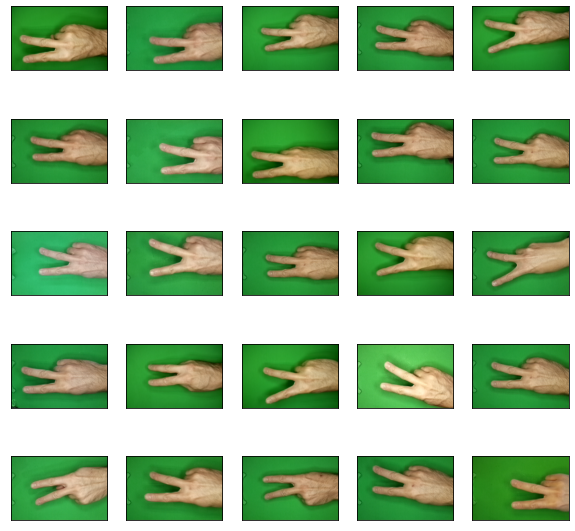

In [55]:
plt.figure(figsize=(10, 10))
for i in range(25):
  img = mpimg.imread(data_dir[2]+random.choice([x for x in os.listdir(data_dir[2])]))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
plt.show()  

In [56]:
print("Paper images: ", len(os.listdir(data_dir[0])))
print("Rock images: ", len(os.listdir(data_dir[1])))
print("Scissor images: ", len(os.listdir(data_dir[2])))

Paper images:  712
Rock images:  726
Scissor images:  750


Move all class directory to single directory for using Keras ImageDataGenerator

In [57]:
!mkdir train
!mv rock train
!mv paper train
!mv scissors train

mkdir: cannot create directory ‘train’: File exists
mv: cannot move 'rock' to 'train/rock': Directory not empty
mv: cannot move 'paper' to 'train/paper': Directory not empty
mv: cannot move 'scissors' to 'train/scissors': Directory not empty


Dataset directory generator

In [134]:
dataset_dir = '/content/train/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='training'
) 

validation_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [135]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 128)      

In [0]:
class AccCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

acc_callback = AccCallback()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [139]:
history = model.fit_generator(
    train_gen, 
    steps_per_epoch = 25,
    epochs=25,
    validation_data=validation_gen,
    validation_steps=35,
    verbose=1
)

Epoch 1/25
25/25 [==============================] - 47s 2s/step - loss: 1.4796 - acc: 0.3120 - val_loss: 1.0958 - val_acc: 0.4218
Epoch 2/25
25/25 [==============================] - 47s 2s/step - loss: 1.1462 - acc: 0.3660 - val_loss: 1.0752 - val_acc: 0.4971
Epoch 3/25
25/25 [==============================] - 51s 2s/step - loss: 1.0919 - acc: 0.4080 - val_loss: 1.0370 - val_acc: 0.5194
Epoch 4/25
25/25 [==============================] - 47s 2s/step - loss: 1.0445 - acc: 0.5112 - val_loss: 0.9796 - val_acc: 0.5216
Epoch 5/25
25/25 [==============================] - 47s 2s/step - loss: 0.9564 - acc: 0.5560 - val_loss: 0.7933 - val_acc: 0.6599
Epoch 6/25
25/25 [==============================] - 47s 2s/step - loss: 0.7866 - acc: 0.6380 - val_loss: 0.7028 - val_acc: 0.7360
Epoch 7/25
25/25 [==============================] - 47s 2s/step - loss: 0.8299 - acc: 0.6720 - val_loss: 0.6336 - val_acc: 0.7392
Epoch 8/25
25/25 [==============================] - 47s 2s/step - loss: 0.6265 - acc: 0.71

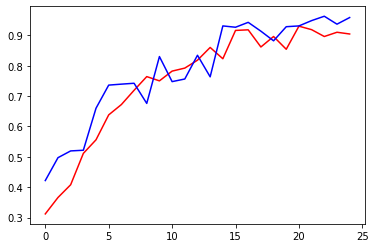

<Figure size 432x288 with 0 Axes>

In [140]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='training')
plt.plot(epochs, val_acc, 'b', label='training')
plt.figure()
plt.show()

In [0]:
model.save('/content/RPS_model.h5')

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

In [126]:
from keras.preprocessing import image

img = image.load_img('photo.jpg', target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)
x /= 255
pred = model.predict(x)
pred

array([[0.5696651 , 0.30623993, 0.12409502]], dtype=float32)

In [0]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

In [1]:
test_dir = "test/rps-test-set/"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict(test_generator,steps = nb_samples)

NameError: ignored

In [132]:
for i in range(nb_samples):
  print("%s predicted as %s"%(filenames[i], classes[np.argmax(predict[i])]))

paper/testpaper01-00.png predicted as rock
paper/testpaper01-01.png predicted as rock
paper/testpaper01-02.png predicted as rock
paper/testpaper01-03.png predicted as rock
paper/testpaper01-04.png predicted as rock
paper/testpaper01-05.png predicted as rock
paper/testpaper01-06.png predicted as rock
paper/testpaper01-07.png predicted as rock
paper/testpaper01-08.png predicted as rock
paper/testpaper01-09.png predicted as rock
paper/testpaper01-10.png predicted as rock
paper/testpaper01-11.png predicted as rock
paper/testpaper01-12.png predicted as rock
paper/testpaper01-13.png predicted as rock
paper/testpaper01-14.png predicted as rock
paper/testpaper01-15.png predicted as rock
paper/testpaper01-16.png predicted as rock
paper/testpaper01-17.png predicted as rock
paper/testpaper01-18.png predicted as rock
paper/testpaper01-19.png predicted as rock
paper/testpaper01-20.png predicted as rock
paper/testpaper01-21.png predicted as rock
paper/testpaper01-22.png predicted as rock
paper/testp